# Term Deposit Prediction


### Bank Business Use Case
There has been a revenue decline for a bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

## Problem Statement

Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

### Feature Description

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
df = pd.read_csv('term_deposit.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,4,55,retired,married,basic.4y,no,yes,no,cellular,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Unnamed: 0.1',axis=1,inplace=True)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Data Analysis and Preparation
    
Data preparation is the process of cleaning and transforming raw data before building predictive models.
​
Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the Dataset

In [5]:
df1=df.copy()

In [6]:
df1.shape

(41188, 21)

In [7]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

### Checking for Data Types

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [9]:
df1.dtypes.value_counts()

object     10
int64       6
float64     5
dtype: int64

#### 1. For getting the statistical summary of numerical variables we use the describe()

In [10]:
df1.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the age ranges from 17 to 98, with mean 40.02.

<b> 2. For getting the statistical summary of categorical features we use the describe(include = object)

In [11]:
df1.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


- The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frequency.

- Lets understand the outputs of the above table using variable <b>'job'<br></b>
count: Number of observations = 41188<br>
unique: Number of unique classes in the column = 12 classes<br>
top: The most occurring class = admin<br>
frequency: Frequency of the most repeated class; out of 41188 observations Reg has a frequency of 10422<br>


### Checking For Null Values & Duplicates

In [12]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [13]:
df1.duplicated().sum()

12

In [14]:
df1.drop_duplicates(inplace=True)

In [15]:
df1.shape

(41176, 21)

### Univariate Data Analysis

In [16]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())


age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
91       2
89       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64

housing
yes        21571
no         18615
unknown      990
Nam

#### Numerical Columns

In [17]:
df1_numerical= df1.select_dtypes(include='number')

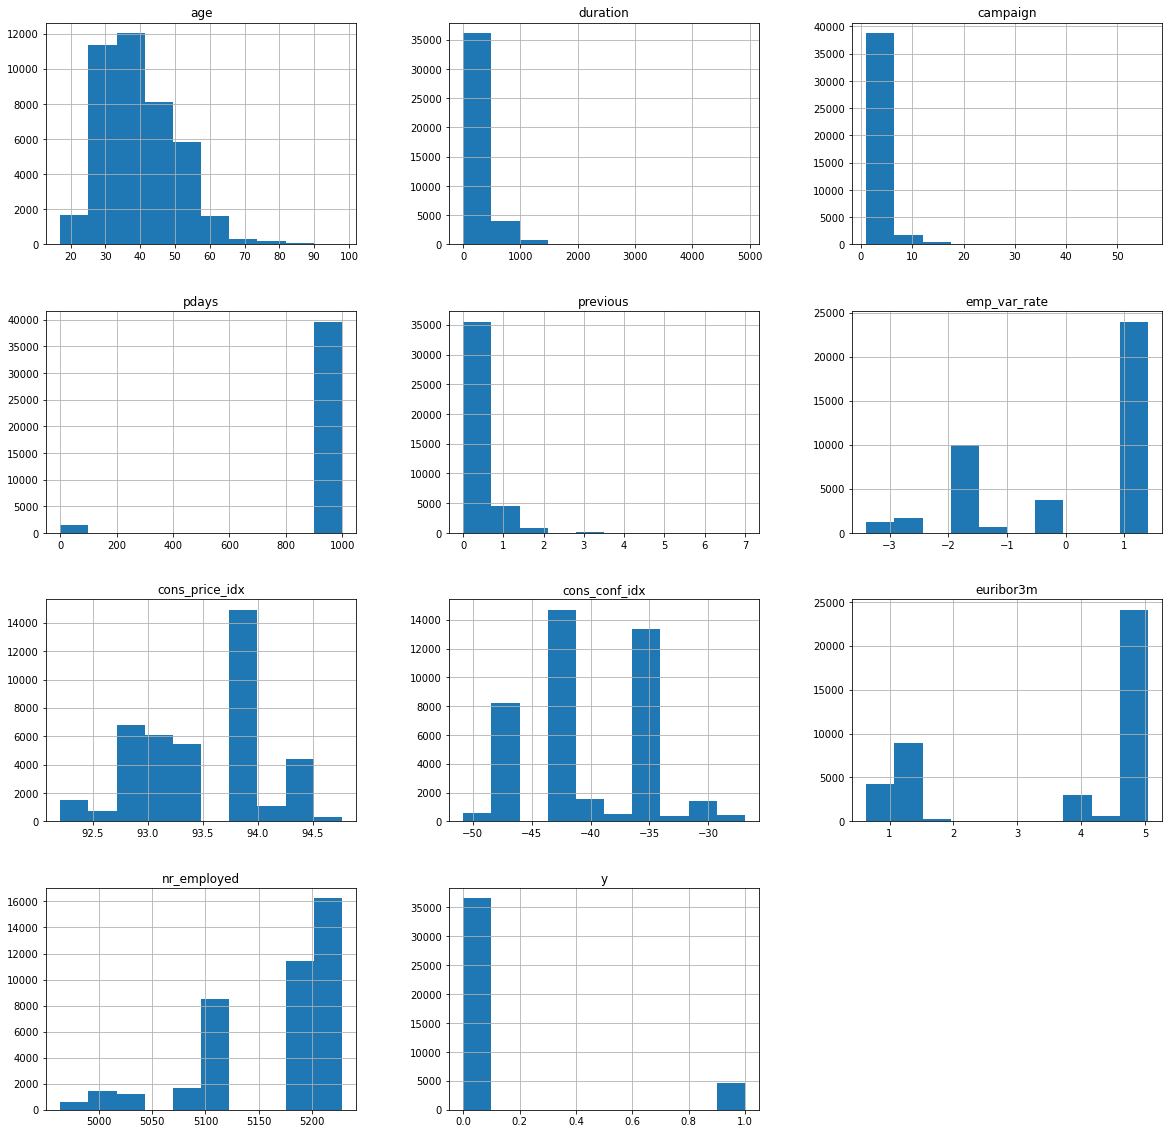

In [18]:
a=df1_numerical.hist(figsize=(20,20))

#### Categorical Columns

In [19]:
df1_categorical= df1.select_dtypes(exclude='number')

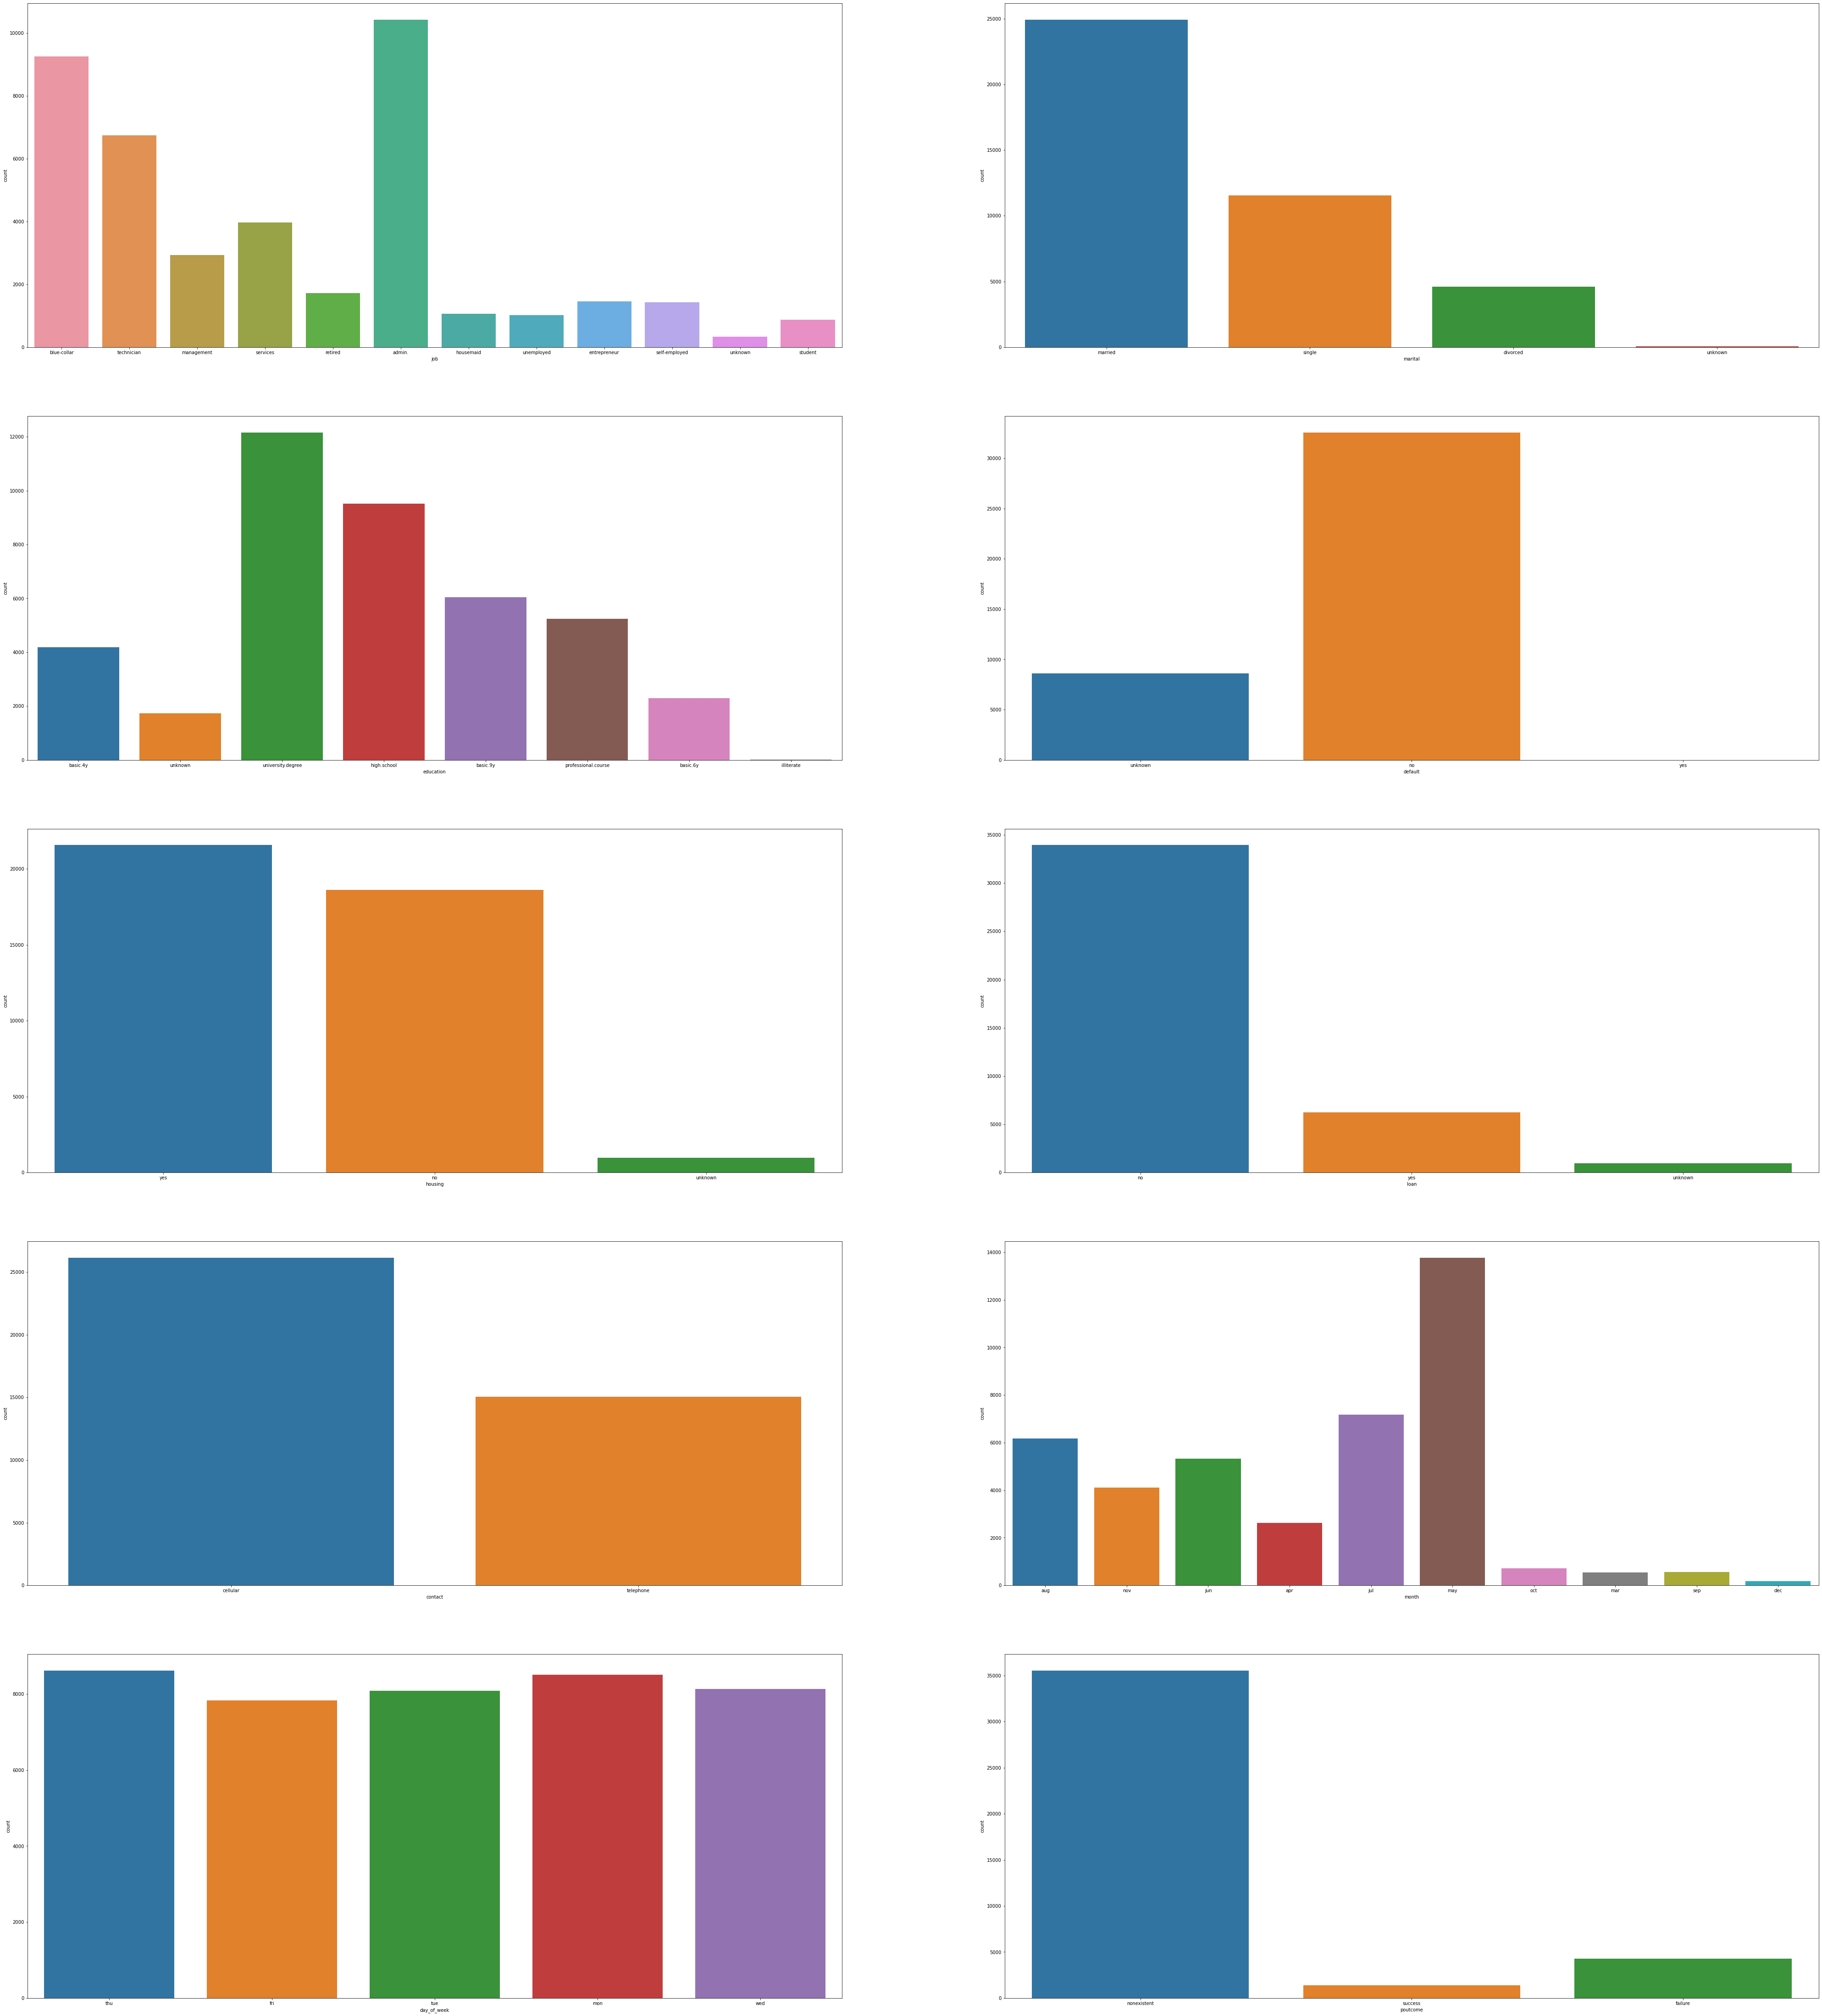

In [20]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (70, 80))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(df1_categorical, ax.flatten()):
    sns.countplot(df1_categorical[variable], ax = subplot)

#### Understanding the target variable

In [21]:
df1['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

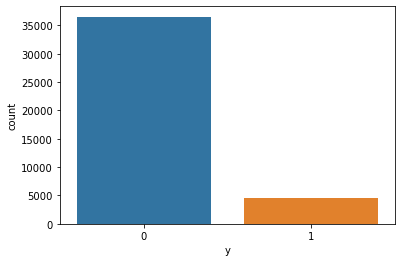

In [22]:
sns.countplot(x=df1['y'])
plt.show()

### Bi-variate Analysis

In [23]:
df1_cat = [i for i in df1.columns if df1[i].dtypes=='object']
print(df1_cat)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [24]:
df1[df1_cat].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


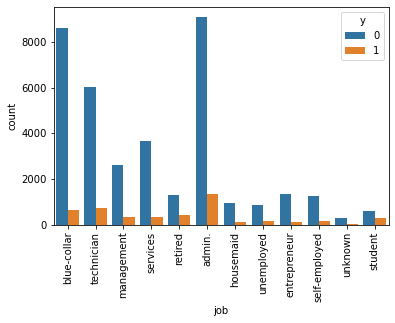

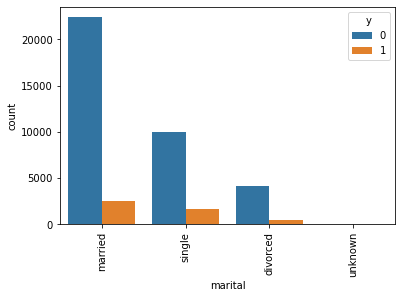

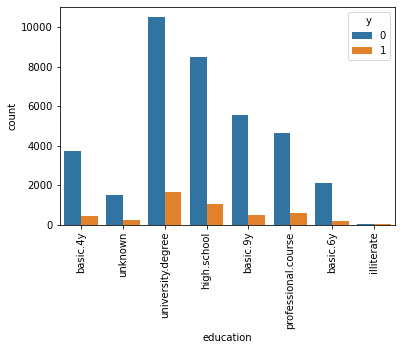

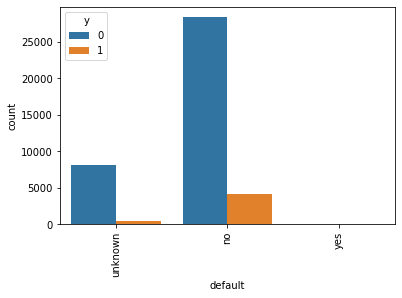

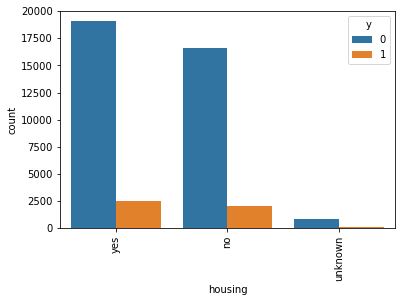

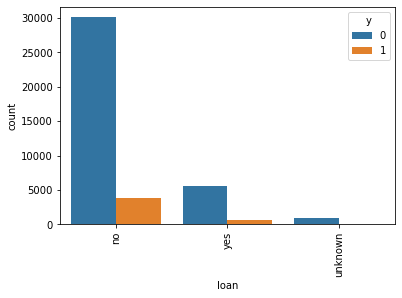

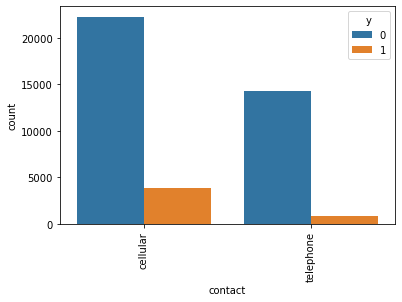

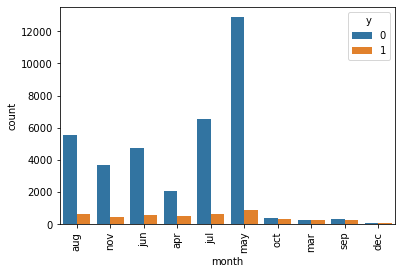

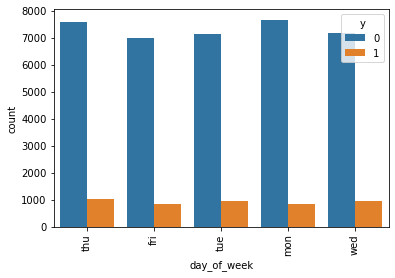

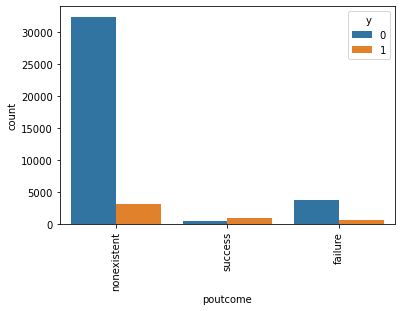

In [25]:
for i in df1_cat:
    sns.countplot(x = df1[i], hue=df1['y'])
    plt.xticks(rotation=90)
    plt.show()

### Encode Categorical Variables
We need to perform label encoding on our categorical variables before we proceed further.

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
lb = LabelEncoder()
for i in df1_cat:
    df1[i] = lb.fit_transform(df1[i])

In [28]:
df1.dtypes.value_counts()

int64      16
float64     5
dtype: int64

### Outlier Treatment

In [29]:
df1.describe(percentiles=[0.1,0.2,0.3,0.5,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,10%,20%,30%,50%,95%,97%,98%,99%,max
age,41176.0,40.023800,10.420680,17.000,28.000,31.000,33.00,38.000,58.000,59.000,62.000,71.000,98.000
job,41176.0,3.724184,3.594459,0.000,0.000,0.000,1.00,2.000,9.000,10.000,10.000,10.000,11.000
marital,41176.0,1.172746,0.608905,0.000,0.000,1.000,1.00,1.000,2.000,2.000,2.000,2.000,3.000
education,41176.0,3.746916,2.136539,0.000,0.000,2.000,2.00,3.000,6.000,7.000,7.000,7.000,7.000
default,41176.0,0.208908,0.406713,0.000,0.000,0.000,0.00,0.000,1.000,1.000,1.000,1.000,2.000
housing,41176.0,1.071789,0.985305,0.000,0.000,0.000,0.00,2.000,2.000,2.000,2.000,2.000,2.000
loan,41176.0,0.327521,0.723700,0.000,0.000,0.000,0.00,0.000,2.000,2.000,2.000,2.000,2.000
contact,41176.0,0.365286,0.481516,0.000,0.000,0.000,0.00,0.000,1.000,1.000,1.000,1.000,1.000
month,41176.0,4.231033,2.319973,0.000,1.000,1.000,3.00,4.000,7.000,8.000,8.000,9.000,9.000
day_of_week,41176.0,2.004614,1.397692,0.000,0.000,1.000,1.00,2.000,4.000,4.000,4.000,4.000,4.000


In [30]:
def outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.98))
    x = x.clip(lower = x.quantile(0.02))
    return x

In [31]:
df1 = df1.apply(outlier_treatment)

In [32]:
df1.describe(percentiles=[0.1,0.2,0.3,0.5,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,10%,20%,30%,50%,95%,97%,98%,99%,max
age,41176.0,39.863318,9.778644,24.000,28.000,31.000,33.00,38.000,58.000,59.000,62.000,62.000,62.000
job,41176.0,3.716170,3.579310,0.000,0.000,0.000,1.00,2.000,9.000,10.000,10.000,10.000,10.000
marital,41176.0,1.170803,0.604652,0.000,0.000,1.000,1.00,1.000,2.000,2.000,2.000,2.000,2.000
education,41176.0,3.746916,2.136539,0.000,0.000,2.000,2.00,3.000,6.000,7.000,7.000,7.000,7.000
default,41176.0,0.208835,0.406481,0.000,0.000,0.000,0.00,0.000,1.000,1.000,1.000,1.000,1.000
housing,41176.0,1.071789,0.985305,0.000,0.000,0.000,0.00,2.000,2.000,2.000,2.000,2.000,2.000
loan,41176.0,0.327521,0.723700,0.000,0.000,0.000,0.00,0.000,2.000,2.000,2.000,2.000,2.000
contact,41176.0,0.365286,0.481516,0.000,0.000,0.000,0.00,0.000,1.000,1.000,1.000,1.000,1.000
month,41176.0,4.217190,2.294317,0.000,1.000,1.000,3.00,4.000,7.000,8.000,8.000,8.000,8.000
day_of_week,41176.0,2.004614,1.397692,0.000,0.000,1.000,1.00,2.000,4.000,4.000,4.000,4.000,4.000


### Studying correlation
- To check the correlation between numerical variables, compute a correlation matrix and plot a heatmap for the correlation matrix

In [33]:
corr = df1.corr()
corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.003779,-0.398928,-0.112983,0.179492,-0.002503,-0.007837,0.017227,-0.030771,-0.020158,...,0.007301,-0.019503,0.006840,0.018569,0.027090,0.016213,0.122678,0.039340,0.015431,0.011304
job,-0.003779,1.000000,0.026811,0.134074,-0.030086,0.006935,-0.010306,-0.025744,-0.034980,-0.001165,...,-0.006909,-0.028325,0.019019,0.011084,-0.008872,-0.016564,0.054493,-0.008436,-0.018757,0.025359
marital,-0.398928,0.026811,1.000000,0.109150,-0.079421,0.011174,0.005913,-0.054725,-0.009060,0.002315,...,-0.009856,-0.037790,0.038887,0.002185,-0.084114,-0.057899,-0.033700,-0.091935,-0.086376,0.046195
education,-0.112983,0.134074,0.109150,1.000000,-0.186966,0.016891,0.006441,-0.105722,-0.085801,-0.017989,...,0.004378,-0.046647,0.035335,0.016987,-0.043695,-0.081941,0.083535,-0.036192,-0.040224,0.057776
default,0.179492,-0.030086,-0.079421,-0.186966,1.000000,-0.015725,-0.003744,0.135488,-0.013089,-0.008792,...,0.037194,0.080097,-0.106026,0.023580,0.203280,0.170146,0.026616,0.195283,0.190041,-0.099356
housing,-0.002503,0.006935,0.011174,0.016891,-0.015725,1.000000,0.044272,-0.082098,-0.018608,0.003339,...,-0.011835,-0.010528,0.021776,-0.011771,-0.060248,-0.082447,-0.033344,-0.059289,-0.046247,0.011613
loan,-0.007837,-0.010306,0.005913,0.006441,-0.003744,0.044272,1.000000,-0.008589,-0.005705,-0.009345,...,0.007990,0.000376,-0.000216,-0.001486,0.001840,-0.002620,-0.012103,0.000089,0.003630,-0.004922
contact,0.017227,-0.025744,-0.054725,-0.105722,0.135488,-0.082098,-0.008589,1.000000,0.282233,-0.009614,...,0.077773,0.117995,-0.227967,0.118773,0.393730,0.600379,0.260122,0.400004,0.271051,-0.144774
month,-0.030771,-0.034980,-0.009060,-0.085801,-0.013089,-0.018608,-0.005705,0.282233,1.000000,0.027649,...,-0.067271,-0.040546,0.099803,-0.067220,-0.172045,-0.014040,-0.003414,-0.109108,-0.202844,-0.012539
day_of_week,-0.020158,-0.001165,0.002315,-0.017989,-0.008792,0.003339,-0.009345,-0.009614,0.027649,1.000000,...,-0.042952,-0.009523,-0.006251,0.018733,0.033288,0.005734,0.041857,0.039095,0.029001,0.015970


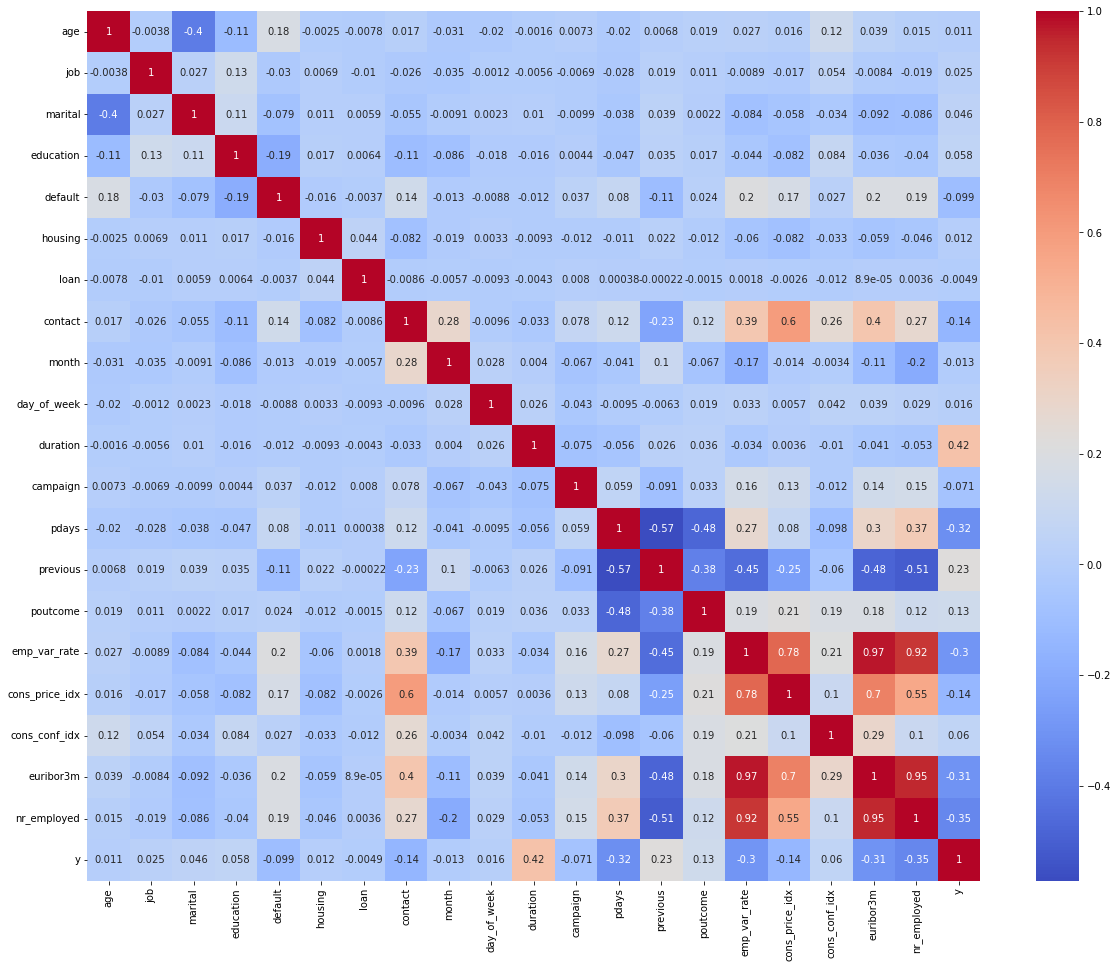

In [34]:
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [35]:
def high_corr(data, thresh):
    res = set()
    corr = data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if corr.iloc[i,j] >= thresh:
                res.add(corr.columns[i])
    return list(res)

multicoll_cols = high_corr(df1,0.7)
print(multicoll_cols)
print(len(multicoll_cols))

['cons_price_idx', 'euribor3m', 'nr_employed']
3


### Inference
- Columns with multicollinearity are:<br>
['cons_price_idx', 'nr_employed', 'euribor3m']

In [36]:
df2=df1.copy()

In [37]:
df2.drop(['cons_price_idx', 'nr_employed', 'euribor3m'],axis=1,inplace=True)
print(len(df2.columns))
print(df2.columns)

18
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_conf_idx', 'y'],
      dtype='object')


In [38]:
df2.dtypes.value_counts()

float64    11
int64       7
dtype: int64

### We will now train models: 
#### Training models with multicollinearity

In [39]:
x = df1.drop('y',axis=1)
y = df1['y']
print(x.shape)
print(y.shape)
print(x.columns)

(41176, 20)
(41176,)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')


## Logistic Regression-1

<b>1. Split the data into training and test sets

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26764, 20)
(14412, 20)
(26764,)
(14412,)


<b> 2. Building a Model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,confusion_matrix,classification_report

In [43]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

<b> 3. Predicting the Y-Pred Values

In [44]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0 0 0 ... 0 0 0]


<b>4. Computing accuracy measures

In [45]:
def gen_metrics(model,x_train,x_test,y_train,y_test,ypred):
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

In [46]:
gen_metrics(m1,x_train,x_test,y_train,y_test,ypred_m1)

Training score 0.9121954864743685
Testing score 0.9095892311962254
[[12350   447]
 [  856   759]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     12797
           1       0.63      0.47      0.54      1615

    accuracy                           0.91     14412
   macro avg       0.78      0.72      0.74     14412
weighted avg       0.90      0.91      0.90     14412



In [47]:
from sklearn.metrics import roc_auc_score,roc_curve

In [48]:
auc_score = roc_auc_score(y_test,m1.predict_proba(x_test)[:,1])
print('Area Under Curve',auc_score)

Area Under Curve 0.9269081061229765


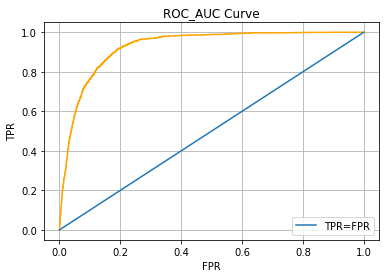

In [49]:
fpr,tpr,thresh = roc_curve(y_test,m1.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

### Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score,KFold

In [51]:
kf = KFold(n_splits=10)
m2 = LogisticRegression(max_iter=1000)
m2.fit(x_train,y_train)
scores = cross_val_score(m2,x,y,cv=kf,scoring='accuracy')
print(scores)
print(scores.mean())

[0.90602234 0.9137931  0.91743565 0.90723652 0.905051   0.91427878
 0.90769978 0.90867136 0.91328637 0.91668691]
0.9110161812633694


<b> So the range of our accuracy is between 0.905 to 0.917 but generally 0.911 on average

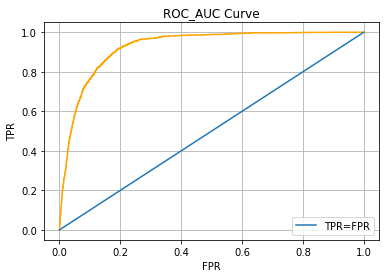

In [52]:
fpr,tpr,thresh = roc_curve(y_test,m2.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

### SGDClassifier-1

In [53]:
from sklearn.linear_model import SGDClassifier

In [87]:
m4 = SGDClassifier(max_iter=250,eta0=0.001,loss='log')
m4.fit(x_train,y_train)

SGDClassifier(eta0=0.001, loss='log', max_iter=250)

In [88]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

[0 0 0 ... 0 0 0]


In [89]:
gen_metrics(m4,x_train,x_test,y_train,y_test,ypred_m4)

Training score 0.898557764160813
Testing score 0.8927282819872329
[[11935   862]
 [  684   931]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     12797
           1       0.52      0.58      0.55      1615

    accuracy                           0.89     14412
   macro avg       0.73      0.75      0.74     14412
weighted avg       0.90      0.89      0.90     14412



In [90]:
y_pred_prob_sgd = m4.predict_proba(x_test)[:,1]
y_pred_sgd = m4.predict(x_test)

In [91]:
auc_score = roc_auc_score(y_test,m4.predict_proba(x_test)[:,1])
print('Area Under Curve',auc_score)

Area Under Curve 0.7618526352562799


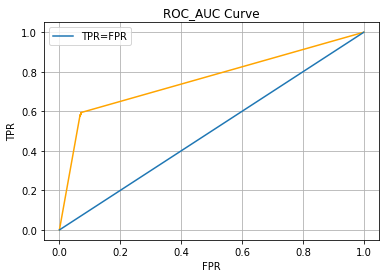

In [92]:
fpr,tpr,thresh = roc_curve(y_test,m4.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

### MLE Model-1

In [60]:
import statsmodels.api as sm

In [61]:
log_mle_model = sm.Logit(y_train,x_train).fit()
log_mle_model.summary()

Optimization terminated successfully.
         Current function value: 0.202649
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                26764
Model:                          Logit   Df Residuals:                    26744
Method:                           MLE   Df Model:                           19
Date:                Sat, 23 Jul 2022   Pseudo R-squ.:                  0.4255
Time:                        16:18:10   Log-Likelihood:                -5423.7
converged:                       True   LL-Null:                       -9440.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0035      0.003      1.274      0.203      -0.002       0.009
job                0.0092      0.007      1.295      0.195      -0.005       0.023
marital            0.1213      0.047      2.577      0.010       0.029       0.213
education          0.0498      0.012      3.995      0.000       0.025       0.074
default           -0.3732      0.082     -4.524      0.000      -0.535      -0.211
housing            0.0227      0.026      0.877      0.380      -0.028       0.073
loan              -0.0231      0.035     -0.654      0.513      -0.092       0.046
contact           -0.7486      0.076     -9.857      0.000      -0.898      -0.600
month             -0.1152      0.011    -10.755      0.000      -0.136      -0.094
day_of_week        0.0578      0.018      3.135      0.002       0.022       0.094
duration           0.0057      0.000     55.718      0.000       0.005       0.006
campaign          -0.0424      0.016     -2.648      0.008      -0.074      -0.011
pdays             -0.0009      0.000     -3.620      0.000      -0.001      -0.000
previous          -0.0686      0.107     -0.643      0.520      -0.278       0.141
poutcome           0.6176      0.120      5.137      0.000       0.382       0.853
emp_var_rate      -0.9524      0.082    -11.643      0.000      -1.113      -0.792
cons_price_idx     0.7661      0.043     17.781      0.000       0.682       0.851
cons_conf_idx      0.0217      0.006      3.462      0.001       0.009       0.034
euribor3m          0.6938      0.097      7.139      0.000       0.503       0.884
nr_employed       -0.0150      0.001    -17.615      0.000      -0.017      -0.013
==================================================================================
"""

In [62]:
y_pred_prob_mle = log_mle_model.predict(x_test)
y_pred_mle = [0 if x < 0.5 else 1 for x in y_pred_prob_mle]

In [63]:
cm = confusion_matrix(y_test,y_pred_mle)
print(cm)
print(classification_report(y_test,y_pred_mle))

[[12367   430]
 [  874   741]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12797
           1       0.63      0.46      0.53      1615

    accuracy                           0.91     14412
   macro avg       0.78      0.71      0.74     14412
weighted avg       0.90      0.91      0.90     14412



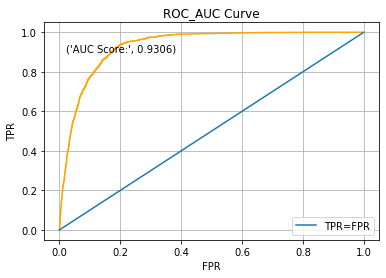

In [64]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_prob_mle)
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob_mle),4)))
plt.grid()
plt.legend()
plt.show()

### Training models without multicollinearity:

In [65]:
x1 = df2.drop('y',axis=1)
y1 = df2['y']
print(x1.shape)
print(y1.shape)
print(x1.columns)

(41176, 17)
(41176,)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_conf_idx'],
      dtype='object')


In [66]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.35,random_state=42)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(26764, 17)
(14412, 17)
(26764,)
(14412,)


### Logistic Regression-2

In [67]:
m3 = LogisticRegression(max_iter=1000)
m3.fit(x_train1,y_train1)
ypred_m3 = m3.predict(x_test1)
print(ypred_m3)

[0 0 0 ... 0 0 0]


In [68]:
gen_metrics(m3,x_train1,x_test1,y_train1,y_test1,ypred_m3)

Training score 0.9071513973994919
Testing score 0.9075076325284485
[[12372   425]
 [  908   707]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12797
           1       0.62      0.44      0.51      1615

    accuracy                           0.91     14412
   macro avg       0.78      0.70      0.73     14412
weighted avg       0.90      0.91      0.90     14412



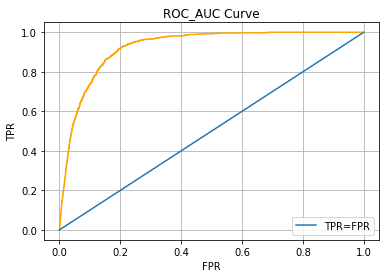

In [69]:
fpr,tpr,thresh = roc_curve(y_test,m3.predict_proba(x_test1)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

### SGDClassifier-2

In [99]:
m5 = SGDClassifier(max_iter=250,eta0=0.001,loss='log')
m5.fit(x_train1,y_train1)

SGDClassifier(eta0=0.001, loss='log', max_iter=250)

In [100]:
ypred_m5 = m5.predict(x_test1)
print(ypred_m5)

[0 0 0 ... 0 0 0]


In [101]:
gen_metrics(m5,x_train1,x_test1,y_train1,y_test1,ypred_m5)

Training score 0.9047974891645494
Testing score 0.9055648071051902
[[12449   348]
 [ 1013   602]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12797
           1       0.63      0.37      0.47      1615

    accuracy                           0.91     14412
   macro avg       0.78      0.67      0.71     14412
weighted avg       0.89      0.91      0.89     14412



In [102]:
y_pred_prob_sgd2= m5.predict_proba(x_test1)[:,1]
y_pred_sgd2 = m5.predict(x_test1)

In [103]:
auc_score = roc_auc_score(y_test1,m5.predict_proba(x_test1)[:,1])
print('Area Under Curve',auc_score)

Area Under Curve 0.7846369517236408


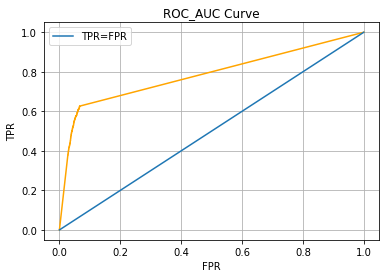

In [104]:
fpr,tpr,thresh = roc_curve(y_test1,m5.predict_proba(x_test1)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

### MLE Model-2

In [76]:
log_mle_model2 = sm.Logit(y_train1,x_train1).fit()
log_mle_model2.summary()

Optimization terminated successfully.
         Current function value: 0.213155
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                26764
Model:                          Logit   Df Residuals:                    26747
Method:                           MLE   Df Model:                           16
Date:                Sat, 23 Jul 2022   Pseudo R-squ.:                  0.3957
Time:                        16:18:13   Log-Likelihood:                -5704.9
converged:                       True   LL-Null:                       -9440.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
age              -0.0002      0.002     -0.061      0.951      -0.005       0.005
job               0.0089      0.007      1.289      0.197      -0.005       0.022
marital           0.0859      0.045      1.929      0.054      -0.001       0.173
education         0.0438      0.012      3.639      0.000       0.020       0.067
default          -0.4826      0.081     -5.964      0.000      -0.641      -0.324
housing           0.0141      0.025      0.561      0.575      -0.035       0.064
loan             -0.0291      0.034     -0.844      0.398      -0.097       0.038
contact          -0.3887      0.070     -5.562      0.000      -0.526      -0.252
month            -0.0767      0.010     -7.765      0.000      -0.096      -0.057
day_of_week       0.0364      0.018      2.044      0.041       0.002       0.071
duration          0.0055    9.8e-05     56.232      0.000       0.005       0.006
campaign         -0.0552      0.016     -3.536      0.000      -0.086      -0.025
pdays            -0.0020      0.000    -12.610      0.000      -0.002      -0.002
previous         -0.1071      0.074     -1.445      0.148      -0.252       0.038
poutcome          0.2722      0.078      3.493      0.000       0.119       0.425
emp_var_rate     -0.6065      0.018    -33.284      0.000      -0.642      -0.571
cons_conf_idx     0.0594      0.004     14.256      0.000       0.051       0.068
=================================================================================
"""

In [77]:
y_pred_prob_mle2 = log_mle_model2.predict(x_test1)
y_pred_mle2 = [0 if x < 0.5 else 1 for x in y_pred_prob_mle2]

In [78]:
cm1 = confusion_matrix(y_test1,y_pred_mle2)
print(cm1)
print(classification_report(y_test1,y_pred_mle2))

[[12375   422]
 [  906   709]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12797
           1       0.63      0.44      0.52      1615

    accuracy                           0.91     14412
   macro avg       0.78      0.70      0.73     14412
weighted avg       0.90      0.91      0.90     14412



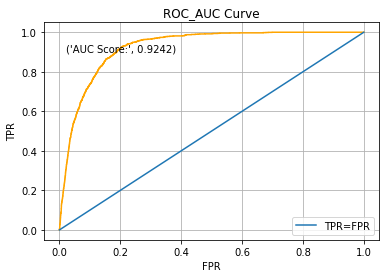

In [79]:
fpr,tpr,thresh = roc_curve(y_test1,y_pred_prob_mle2)
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test1, y_pred_prob_mle2),4)))
plt.grid()
plt.legend()
plt.show()

### MLE Model-3 
<b>- after removing columns having P>|z| value greater than 0.5

In [80]:
x_train2=x_train1.drop(['age','housing'],axis=1)
x_test2=x_test1.drop(['age','housing'],axis=1)

In [81]:
log_mle_model3 = sm.Logit(y_train1,x_train2).fit()
log_mle_model3.summary()

Optimization terminated successfully.
         Current function value: 0.213161
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                26764
Model:                          Logit   Df Residuals:                    26749
Method:                           MLE   Df Model:                           14
Date:                Sat, 23 Jul 2022   Pseudo R-squ.:                  0.3957
Time:                        16:18:14   Log-Likelihood:                -5705.0
converged:                       True   LL-Null:                       -9440.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
job               0.0089      0.007      1.295      0.195      -0.005       0.022
marital           0.0871      0.041      2.139      0.032       0.007       0.167
education         0.0440      0.012      3.663      0.000       0.020       0.068
default          -0.4831      0.080     -6.017      0.000      -0.640      -0.326
loan             -0.0282      0.034     -0.819      0.413      -0.096       0.039
contact          -0.3902      0.070     -5.589      0.000      -0.527      -0.253
month            -0.0767      0.010     -7.764      0.000      -0.096      -0.057
day_of_week       0.0365      0.018      2.050      0.040       0.002       0.071
duration          0.0055   9.79e-05     56.241      0.000       0.005       0.006
campaign         -0.0551      0.016     -3.532      0.000      -0.086      -0.025
pdays            -0.0020      0.000    -14.502      0.000      -0.002      -0.002
previous         -0.1070      0.067     -1.601      0.109      -0.238       0.024
poutcome          0.2731      0.068      3.992      0.000       0.139       0.407
emp_var_rate     -0.6067      0.018    -33.581      0.000      -0.642      -0.571
cons_conf_idx     0.0593      0.004     14.247      0.000       0.051       0.067
=================================================================================
"""

In [82]:
y_pred_prob_mle3 = log_mle_model3.predict(x_test2)
y_pred_mle3 = [0 if x < 0.5 else 1 for x in y_pred_prob_mle3]

In [83]:
cm1 = confusion_matrix(y_test1,y_pred_mle3)
print(cm1)
print(classification_report(y_test1,y_pred_mle3))

[[12374   423]
 [  907   708]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12797
           1       0.63      0.44      0.52      1615

    accuracy                           0.91     14412
   macro avg       0.78      0.70      0.73     14412
weighted avg       0.90      0.91      0.90     14412



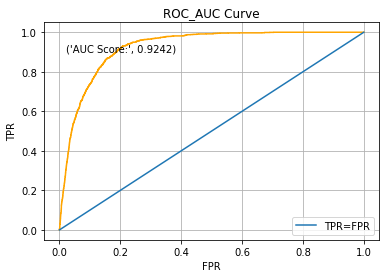

In [84]:
fpr,tpr,thresh = roc_curve(y_test1,y_pred_prob_mle3)
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test1, y_pred_prob_mle2),4)))
plt.grid()
plt.legend()
plt.show()

### Tabulating the result after adding new columns and applying MLE & SGD Models

In [85]:
from sklearn import metrics

In [105]:
pd.DataFrame({"Model":["Maximum Likelihood Estimation-1","Stochastic Gradient Descent-1","Maximum Likelihood Estimation-2","Stochastic Gradient Descent-2",'Maximum Likelihood Estimation-3'],
         "AUC Score":[roc_auc_score(y_test, y_pred_prob_mle),roc_auc_score(y_test, y_pred_prob_sgd),roc_auc_score(y_test1, y_pred_prob_mle2),roc_auc_score(y_test1, y_pred_prob_sgd2),roc_auc_score(y_test1, y_pred_prob_mle3)],
        "Precision Score":[metrics.precision_score(y_test,y_pred_mle),metrics.precision_score(y_test,y_pred_sgd),metrics.precision_score(y_test1,y_pred_mle2),metrics.precision_score(y_test1,y_pred_sgd2),metrics.precision_score(y_test1,y_pred_mle3)],
        "Recall Score":[metrics.recall_score(y_test, y_pred_mle),metrics.recall_score(y_test, y_pred_sgd),metrics.recall_score(y_test1, y_pred_mle2),metrics.recall_score(y_test1, y_pred_sgd2),metrics.recall_score(y_test1, y_pred_mle3)],
        "Accuracy Score":[metrics.accuracy_score(y_test, y_pred_mle),metrics.accuracy_score(y_test, y_pred_sgd),metrics.accuracy_score(y_test1, y_pred_mle2),metrics.accuracy_score(y_test1, y_pred_sgd2),metrics.accuracy_score(y_test1, y_pred_mle3)],
        "F1-Score": [metrics.f1_score(y_test, y_pred_mle),metrics.f1_score(y_test, y_pred_sgd),metrics.f1_score(y_test1, y_pred_mle2),metrics.f1_score(y_test1, y_pred_sgd2),metrics.f1_score(y_test1, y_pred_mle3)]})

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,F1-Score
0,Maximum Likelihood Estimation-1,0.930564,0.632792,0.458824,0.909520,0.531945
1,Stochastic Gradient Descent-1,0.761853,0.519241,0.576471,0.892728,0.546362
2,Maximum Likelihood Estimation-2,0.924200,0.626879,0.439009,0.907855,0.516387
3,Stochastic Gradient Descent-2,0.784637,0.633684,0.372755,0.905565,0.469396
4,Maximum Likelihood Estimation-3,0.924235,0.625995,0.438390,0.907716,0.515659


### Conclusion:
- With both SGD models and MLE Models; we see that the accuracy score and roc_auc curve are similar and are providing good results with around 90% accuracy. There precision and recall values are also similar.
- Overall, MLE Model-1 is performing better.(but it has multicollinearity)
- MLE Model-2 is the best one.